<a href="https://colab.research.google.com/github/DARIOGEORGE/basic-nn-model/blob/main/Deeplearning(Ex1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('data').sheet1

rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})
df.head()

,Input,Output
0,1.0,2.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
4,5.0,10.0


In [ ]:
x=df[['Input']].values
y=df[['Output']].values
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)
scalar=MinMaxScaler()
scalar.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1=scalar.transform(x_train)
ai=Sequential([
    Dense (units = 8, activation = 'relu'),
    Dense (units = 10, activation = 'relu'),
    Dense (units = 1)])


In [ ]:
#212222230027 DARIO G
ai.compile(optimizer='rmsprop',loss='mse')
ai.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 517.9229
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 517.4371
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 517.0909
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 516.8064
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 516.5574
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 516.3290
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 516.1176
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 515.9175
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 515.7260
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 515.5437
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 515.3661
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 515.1895
Epoch 13/2000
1/1 [

<Axes: >

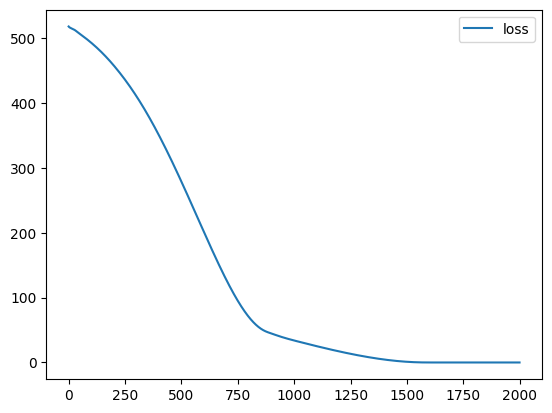

In [ ]:
loss_df = pd.DataFrame(ai.history.history)
loss_df.plot()
#212222230027

In [ ]:
#DARIO G
X_test1 = scalar.transform(x_test)
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 150ms/step - loss: 0.0013


0.0013497404288500547

In [ ]:
#212222230027
X_n1 = [[5]]
X_n1_1 = scalar.transform(X_n1)
ai.predict(X_n1_1)

1/1 [==============================] - 0s 94ms/step


array([[10.02017]], dtype=float32)